In [10]:
# Data Preprocessing (데이터 전처리)
import pandas as pd
df = pd.read_excel("titanic.xlsx")
print(df)
print()

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [11]:
# 결측값 처리하기

# value_counts(dropna=False) : 결측값(NaN)을 제외하지 않고, 결측값도 빈도에 포함
nan_deck = df['deck'].value_counts(dropna=False) 
print(nan_deck)
print()

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64



In [8]:
# df.head()는 데이터프레임의 상위 5개 행을 반환
# isnull()은 각 셀에 결측값(NaN)이 있는지 여부를 확인하는 함수로, 결측값이 있는 셀은 True, 없는 셀은 False를 반환
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [9]:
# 각 셀이 결측값이 아니라면 True, 결측값이라면 False를 반환
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


In [7]:
# sum(axis=0)은 열 단위로 True의 개수를 셈
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


In [13]:
import pandas as pd
# titanic.xlsx 파일에서 데이터를 읽어와서 df라는 데이터프레임에 저장
df = pd.read_excel("titanic.xlsx")

# "age" 열에서 상위 10개의 값을 출력
print(df['age'].head(10))
print()

# "age" 열의 평균값을 계산, 결측값(NaN)은 제외하고 평균을 계산
mean_age = df['age'].mean(axis=0)

# fillna(mean_age)는 "age" 열에서 결측값(NaN)을 mean_age(평균값)으로 채운다.
df['age'].fillna(mean_age, inplace=True)
print(df['age'].head(10))
print()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64



/var/folders/jg/4s9vwdvj78b4mywd_ds9z14r0000gn/T/ipykernel_58549/2712848575.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


In [16]:
# "titanic.xlsx"라는 새 컬럼을 불러옴
df = pd.read_excel("titanic.xlsx")
# "embark_town" 열에서 825번에서 829번까지의 값을 출력
print(df['embark_town'][825:830])
print()

# "embark_town" 열에서 결측값을 제외하고 값의 빈도를 세는 함수
# idxmax()는 가장 빈도수가 높은 값(즉, "embark_town" 열에서 가장 자주 등장하는 값)을 반환
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)
print()

# "embark_town" 열의 결측값을 most_freq (가장 자주 등장하는 값)으로 채운다.
df['embark_town'].fillna(most_freq, inplace=True)
print(df['embark_town'][825:830])
print()

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

Southampton

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object



/var/folders/jg/4s9vwdvj78b4mywd_ds9z14r0000gn/T/ipykernel_58549/770258244.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(most_freq, inplace=True)


In [18]:
df = pd.read_excel("titanic.xlsx")
print(df['embark_town'][825:830])
print()

# fillna(method='ffill')는 결측값을 직전의 값으로 채우는 방법
# 이 방식을 forward fill(전방 채움)이라고 하며, 결측값을 그 앞에 있는 값으로 대체하는 것
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


/var/folders/jg/4s9vwdvj78b4mywd_ds9z14r0000gn/T/ipykernel_58549/2003814731.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(method='ffill', inplace=True)
/var/folders/jg/4s9vwdvj78b4mywd_ds9z14r0000gn/T/ipykernel_58549/2003814731.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embark_town'].fillna(method='ffill', inplace=True)


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#데이터 불러오기
df = pd.read_csv("heart_2020_cleaned.csv")
print(df)
print()

df.info()

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

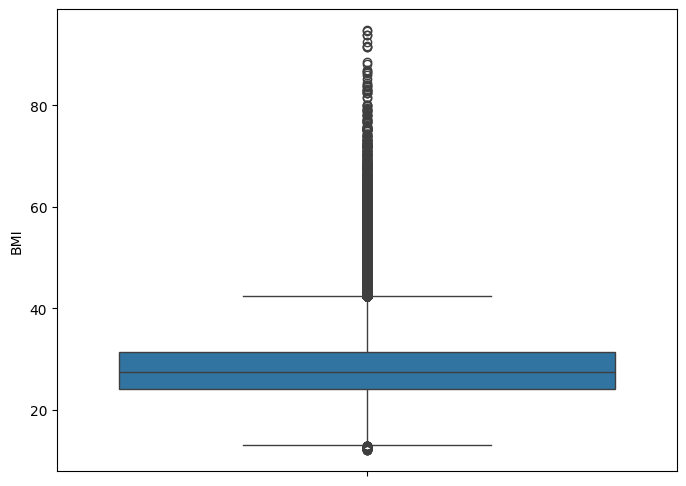

In [21]:
#BMI 칼럼의 박스플롯 시각화를 통한 이상치 확인

# 그래프의 크기를 설정
plt.figure(figsize=(8, 6))
# seaborn 라이브러리를 사용해 박스플롯을 생성하는 함수
# 박스플롯에서 BMI 칼럼의 값을 y축에 표시
# data=df: df 데이터프레임에서 데이터를 가져옴.
sns.boxplot(y = 'BMI', data = df)

# 그래프 그리기
plt.show()

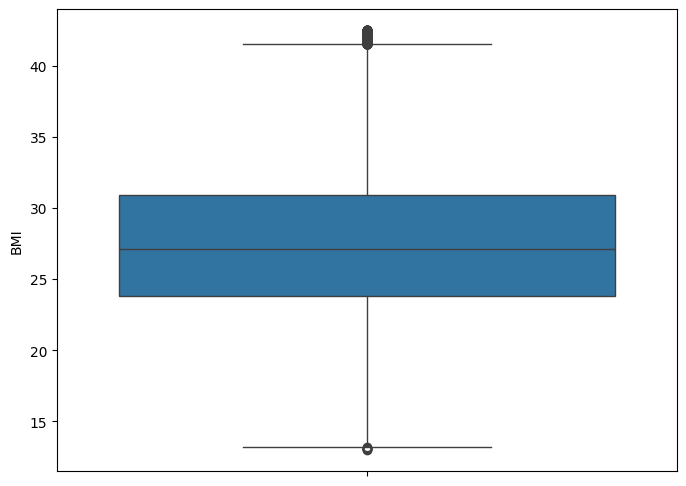

In [23]:
#BMI 칼럼에서 이상치(outliers)를 제거하는 과정

# 1사분위수(Q1)를 계산, 이는 BMI 값 중에서 하위 25%에 해당하는 값을 의미
Q1 = df['BMI'].quantile(0.25)
# 3사분위수(Q3)를 계산, 이는 BMI 값 중 상위 25%에 해당하는 값을 의미
Q3 = df['BMI'].quantile(0.75)

# IQR(Interquartile Range, 사분위 범위)은 Q3에서 Q1을 뺀 값으로, 중간 50% 데이터의 범위를 나타낸다.
# 이 값은 이상치를 탐지할 때 사용
IQR = Q3 - Q1

#  IQR의 1.5배를 의미하며, 일반적으로 이상치를 판단하는 기준으로 사용
rev_range = 1.5

# (df['BMI'] >= Q1 - rev_range * IQR)는 BMI 값이 Q1에서 1.5 * IQR 이하로 벗어나지 않도록 필터링
# (df['BMI'] <= Q3 + rev_range * IQR)는 BMI 값이 Q3에서 1.5 * IQR 이상 벗어나지 않도록 필터링
# 두 조건은 AND 연산자(&)로 연결되어 이 범위 내에 있는 값들만 정상 범위로 간주
filter = (df['BMI'] >= Q1 - rev_range*IQR) & (df['BMI'] <= Q3 + rev_range*IQR)

# 필터 조건을 만족하는 행들만 선택하여 새로운 데이터프레임 df_rmv에 저장
df_rmv = df.loc[filter]

#BMI 칼럼의 박스플롯 시각화를 통해 이상치가 잘 제거 되었는지 확인
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.show()

In [24]:
# 자동차 연비 데이터(mpg.csv)에서 'horsepower' 값을 기반으로 출력을 범주형(bin)으로 나누는 작업을 수행

import pandas as pd
import numpy as np

df = pd.read_csv("mpg.csv")

#  'horsepower' 열에서 결측값(NaN)을 가진 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)

# 자동차의 마력(horsepower)을 범주화하기 위해 사용할 **레이블(labels)**을 정의
bin_names = ['저출력', '보통출력', '고출력']

# 'horsepower' 값을 pd.cut() 함수를 사용해 범주형(bin) 데이터로 나눈다.
# 0에서 100까지는 저출력, 101에서 200까지는 보통출력, 201에서 1000까지는 고출력으로 분류
# labels=bin_names: 위에서 정의한 레이블을 각 구간에 할당
# include_lowest=True: 첫 번째 구간(0-100)에 속하는 최소값을 포함
df['hp_bin'] = pd.cut(x=df['horsepower'], bins=[0, 100, 200, 1000],
                            labels=bin_names, include_lowest=True)

# 데이터프레임에서 **'horsepower'**와 새로 만든 'hp_bin' 열만 선택하여 출력(15줄만)
print(df[['horsepower', 'hp_bin']].head(15))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0   보통출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0   보통출력
10       170.0   보통출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [30]:
# 'horsepower' 데이터를 범주형(bin)으로 나누고, 이 범주 데이터를 더미 변수(dummy variables)로 변환하는 작업
import pandas as pd

df = pd.read_csv('mpg.csv')
# 결측치 제거
df.dropna(subset=['horsepower'], axis=0, inplace=True)

# 범주 레이블(labels) 정의
bin_names = ['저출력', '보통출력', '고출력']

#  'horsepower' 열의 값을 범주형 데이터로 나눔.
df['hp_bin'] = pd.cut(x=df['horsepower'], bins=[0, 100, 200, 1000],
                            labels=bin_names, include_lowest=True)

# 범주형 데이터를 더미 변수(dummy variables)로 변환
# 해당 범주에 해당하는 경우는 1, 그렇지 않은 경우는 0으로 표시
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))
print()

      저출력   보통출력    고출력
0   False   True  False
1   False   True  False
2   False   True  False
3   False   True  False
4   False   True  False
5   False   True  False
6   False  False   True
7   False  False   True
8   False  False   True
9   False   True  False
10  False   True  False
11  False   True  False
12  False   True  False
13  False  False   True
14   True  False  False



In [31]:
# 기존 데이터프레임 df에서 'hp_bin' 열을 더미 변수로 변환하고, 결과를 새로운 데이터프레임 df1에 저장
df1 = pd.get_dummies(df, columns=['hp_bin'])
print(df1)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  hp_bin_저출력  hp_bin_보통출력  \
0            70     usa  chevrolet chevelle malibu      

In [38]:
# 데이터의 표준화와 정규화

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("wine-clustering.csv")
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [39]:
# 표준화
# 표준화는 데이터의 평균을 0, 분산을 1로 변환하는 과정

# 객체 생성
StandardScaler = StandardScaler()

# 데이터 df를 표준화.
# fit()은 데이터를 기반으로 평균과 표준편차를 계산하고, transform()은 이 계산된 값으로 데이터를 변환, 결과는 표준화된 값들
df_stand = StandardScaler.fit_transform(df)

# 표준화된 값을 다시 DataFrame으로 변환하여 df_stand에 저장.
# 원래 데이터의 열 이름을 유지하기 위해 columns=df.columns를 사용
df_stand = pd.DataFrame(data = df_stand, columns=df.columns)


print(df_stand.head())

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.96524

In [40]:
#정규화
#  정규화는 데이터의 값을 특정 범위(기본적으로 0과 1)로 변환하는 과정. 
# 이는 데이터의 최소값을 0, 최대값을 1로 조정하여 데이터의 스케일을 맞추는 데 유용하다.

# 객체 생성
MinMaxScaler = MinMaxScaler()

# 데이터 df를 정규화
# fit()은 데이터의 최소값과 최대값을 계산하고, transform()은 이를 기준으로 데이터를 0과 1 사이의 값으로 변환
df_minmax = MinMaxScaler.fit_transform(df)

# 정규화된 값을 다시 DataFrame으로 변환하여 df_minmax에 저장
df_minmax = pd.DataFrame(data = df_minmax, columns=df.columns)

# 출력
print(df_minmax.head())

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1  0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2  0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3  0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4  0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.573840              0.283019         0.593060         0.372014   
1    0.510549              0.245283         0.274448         0.264505   
2    0.611814              0.320755         0.757098         0.375427   
3    0.664557              0.207547         0.558360         0.556314   
4    0.495781              0.490566         0.444795         0.259386   

        Hue     OD280   Proline  
0  0.455285  0.970696  0.561341  
1  0.463415  0.780220  0.55064

In [43]:
# 머신러닝에 필요한 훈련용(train)과 테스트용(test) 데이터를 분리하는 과정

import pandas as pd

df = pd.read_excel("titanic.xlsx")
print(df)
print()

# 데이터프레임 df에서 'survived' 열을 제외한 나머지 데이터를 X 변수에 저장, 이는 모델이 학습할 입력 데이터
# 이는 모델이 학습할 입력 데이터
X = df.drop('survived', axis=1)
# y는 예측하려는 목표 변수(target variable)이며, 타이타닉 승객이 생존했는지 여부(0 또는 1)를 나타냄
y = df['survived']

from sklearn.model_selection import train_test_split

# 입력 데이터 X와 목표 변수 y를 훈련용과 테스트용으로 분리
# test_size=0.3: 전체 데이터 중 30%를 테스트용 데이터로 할당하고, 70%를 훈련용 데이터로 사용
# random_state=0: 무작위로 데이터를 섞을 때의 시드(seed) 값을 설정하여 데이터 분할이 항상 동일한 방식으로 이루어지도록 고정
# stratify=y: 데이터를 층화 추출(stratified sampling) 방식으로 분할
# shuffle=True: 데이터를 분할하기 전에 무작위로 섞어(shuffle)준다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,
                                                    stratify=y, shuffle=True)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [45]:
# KFold 교차 검증을 설정하여 데이터를 10개의 폴드(fold)로 분할하려는 작업을 수행

import pandas as pd
df = pd.read_excel("iris.xlsx")

from sklearn.model_selection import KFold

# n_splits=10: 데이터를 10개의 폴드(folds)로 나눔. 즉, 각 폴드는 10%의 데이터를 포함하며, 전체 데이터셋에서 10번 반복해서 훈련과 테스트를 수행
# shuffle=True: 데이터를 분할하기 전에 무작위로 섞는다.
# shuffle=True와 함께 사용되어 데이터가 항상 동일한 방식으로 섞이도록 난수 seed 고정
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# 데이터를 10개의 폴드로 나누고, 각 폴드의 훈련 인덱스와 테스트 인덱스를 생성
# 반환값은 각 폴드에 대한 (train_index, test_index)의 쌍으로 이루어진 리스트
list(kfold.split(df))

[(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,  55,  56,
          57,  58,  59,  60,  61,  64,  65,  66,  67,  68,  69,  70,  72,
          74,  75,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,  88,
          89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 102,
         103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
         145, 146, 147, 148, 149]),
  array([  7,  33,  40,  51,  54,  62,  63,  71,  73,  76,  86, 100, 107,
         114, 134])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
          14,  15,  17,  18,  19,  20,  21,  23,  25, 

In [48]:
# 혼동 행렬(confusion matrix)과 분류 보고서(classification report)를 출력하는 작업

import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_excel("test.xlsx")
print(df)
print()

    y_test  y_pred
0        0       0
1        1       1
2        1       1
3        1       1
4        0       0
5        0       1
6        0       1
7        0       0
8        0       1
9        0       0
10       0       0
11       1       1
12       1       1
13       1       1
14       1       0
15       0       0
16       0       1
17       0       0
18       0       0
19       0       0
20       0       0
21       1       1
22       1       1
23       1       1
24       0       1
25       1       1
26       0       0
27       1       1
28       1       1
29       1       1



In [ ]:
# 혼동 행렬(confusion matrix)을 계산
confusion_matrix(df['y_test'], df['y_pred'])

# 분류 보고서(classification report)를 생성하여 모델의 성능 지표를 제공
# Precision: 모델이 Positive로 예측한 샘플 중 실제로 Positive인 비율.
# Recall: 실제 Positive인 샘플 중에서 모델이 올바르게 예측한 비율.
# F1-Score: Precision과 Recall의 조화 평균. 이 점수는 Precision과 Recall의 균형을 측정.
# Support: 각 클래스에 속하는 샘플의 개수.
classification_report(df['y_test'], df['y_pred'])


print(classification_report(df['y_test'], df['y_pred']))

In [49]:
# 정확도(accuracy) 계산
from sklearn.metrics import accuracy_score
accuracy_score(df['y_test'], df['y_pred'])

# 정밀도 (Precision Score) 계산
from sklearn.metrics import precision_score
precision_score(df['y_test'], df['y_pred'], average=None)

# 재현율 (Recall Score) 계산
from sklearn.metrics import recall_score
recall_score(df['y_test'], df['y_pred'], average=None)

# F1-점수 (F1 Score) 계산
from sklearn.metrics import f1_score
f1_score(df['y_test'], df['y_pred'], average=None)

0.8

In [50]:
# 회귀 분석 결과를 평가하기 위해 잔차(residuals), SSE, SST, SSR, 그리고 AE를 계산하는 작업을 수행

import pandas as pd

# data['y']: 실제 값(종속 변수, y)이 포함된 열
data = pd.read_excel("회귀예측.xlsx")
# pred['pred']: 회귀 모델에서 예측한 값(독립 변수, pred)이 포함된 열
pred = pd.read_csv("pred.csv")


# 잔차(residuals)는 실제 값과 예측 값의 차이를 나타냄
residuals = data['y']-pred['pred'] #잔차

# SSE(Sum of Squared Errors, 잔차 제곱합)는 잔차의 제곱을 모두 더한 값
SSE = (residuals**2).sum()
print(SSE)

# SST(Total Sum of Squares, 총 제곱합)은 실제 값과 평균 값 간의 차이를 제곱한 후 모두 더한 값
SST = ((data['y']-data['y'].mean())**2).sum()
print(SST)

# SSR(Sum of Squares for Regression, 회귀 제곱합)은 예측 값과 실제 값의 평균 간의 차이를 제곱한 후 모두 더한 값
SSR = ((pred['pred'] - data['y'].mean())**2).sum()
print(SSR)

# AE(Average Error, 평균 오차)는 실제 값과 예측 값 간의 차이의 평균을 계산한 값
AE = ((data['y'] - pred['pred']).sum())/6
print(AE)

439.5036496350372
964.0
1292.9635036496354
3.3333333333333406


In [51]:
# 다양한 회귀 모델 성능 평가 지표를 사용하여 
# 평균 절대 오차(MAE), 평균 제곱 오차(MSE), 평균 제곱근 오차(RMSE), 
# 평균 절대 백분율 오차(MAPE)를 계산하는 작업을 수행

# MAE(평균 절대 오차)는 실제 값과 예측 값의 차이의 절대값을 평균한 값
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(data['y'], pred['pred'])
print(MAE)

# MSE(평균 제곱 오차)는 예측 오차의 제곱을 평균한 값
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(data['y'], pred['pred'])
print(MSE)

# RMSE(평균 제곱근 오차)는 MSE의 제곱근으로, MSE에서 제곱의 단위를 원래 스케일로 되돌리기 위한 값
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(data['y'], pred['pred'], squared=False)
print(RMSE)

# MAPE(평균 절대 백분율 오차)는 실제 값과 예측 값 사이의 차이를 백분율로 나타낸 것
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(data['y'], pred['pred'])
print(MAPE)

4.958637469586378
73.2506082725062
8.558656919897315
0.08751420459298238


/Users/sindongseong/DsStudy/konkuk-da/myenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
